In [9]:
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [4]:
rental_price = pd.read_csv(
    Path("/Users/thunguyen/Documents/Fintech/rental/rent.csv"),
    index_col="Year")
display(rental_price.head())
display(rental_price.tail())

,Vacancy Rate (%),Availability Rate (%),Average Rent ($),Median Rent ($),% Change,Units
Year,,,,,,
2011 October,2.5,3.4,826,775,2.3,"1,838,977"
2012 October,2.8,3.7,844,800,2.1,"1,853,137"
2013 October,2.9,3.9,862,800,2.5,"1,916,660"
2014 October,3.0,3.9,883,825,2.4,"1,961,877"
2015 October,3.5,4.5,907,850,2.3,"1,996,883"


,Vacancy Rate (%),Availability Rate (%),Average Rent ($),Median Rent ($),% Change,Units
Year,,,,,,
2017 October,3.0,3.9,956,886,2.7,"2,062,419"
2018 October,2.4,**,997,912,3.4,"2,100,561"
2019 October,2.3,**,"1,049",959,4.1,"2,126,060"
2020 October,3.1,**,"1,097","1,000",3.7,"2,174,373"
2021 October,3.1,**,"1,134","1,047",3.0,"2,215,712"


In [6]:
rental_price = rental_price[["Average Rent ($)"]]

In [13]:
rental_price.hvplot(
    xlabel='Year',
    ylabel='Average Rent ($)', 
    rot=45,
    label='Rental price index in Canada from 2011 to 2021',
    color = '#FFB703'
)

:Curve   [Year]   (Average Rent ($))

In [16]:
housing_df = pd.read_csv(
    Path("/Users/thunguyen/Documents/Fintech/rental/housing_data.csv"))
housing_df = housing_df[["Date","Average Price"]]

housing_df["Date"] = pd.to_datetime(housing_df["Date"])

housing_df["Year"] = housing_df["Date"].dt.year

yearly_housing_data = housing_df.groupby("Year").mean()

yearly_housing_data["Average Price"] = yearly_housing_data["Average Price"].div(10000).round(2)

In [34]:
population_df = pd.read_csv(
    Path("/Users/thunguyen/Documents/Fintech/rental/population_growth.csv"), index_col= "Year")
population_df = population_df[["Population"]]
population_df["Population"] = population_df["Population"].div(1000000).round(2)

<AxesSubplot: title={'center': 'Correlation of interest rates and housing prices'}, xlabel='Average Price', ylabel='Population'>

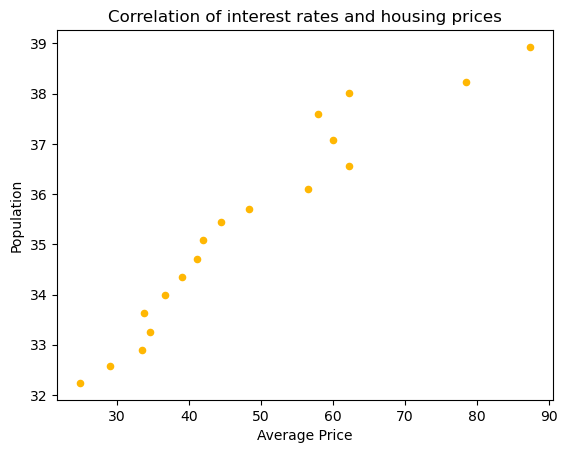

In [41]:
correlation_housing_population_df.plot(kind='scatter', x='Average Price', y='Population', title="Correlation of interest rates and housing prices", color = '#FFB703')

In [24]:
interest_df = pd.read_csv(
    Path("/Users/thunguyen/Documents/Fintech/rental/interest_rates.csv"))
interest_df["Date"] = pd.to_datetime(interest_df["Date"])

interest_df["Year"] = interest_df["Date"].dt.year

yearly_interest_df = interest_df.groupby("Year").mean()

/Users/thunguyen/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Correlation of population growth and housing prices'}, xlabel='Average Price', ylabel='Prime Rate'>

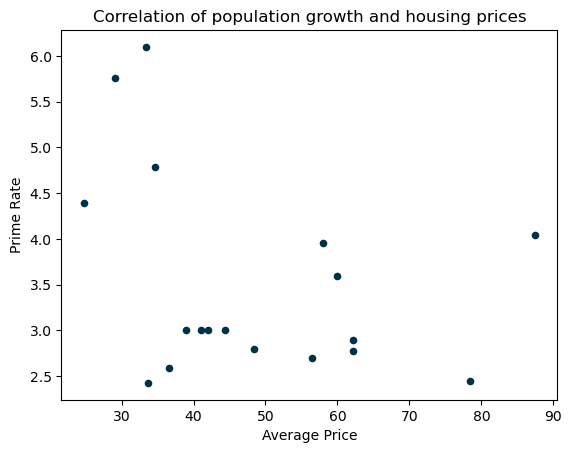

In [47]:
correlation_housing_interest_df = pd.concat([yearly_interest_df, yearly_housing_data], axis="columns", join="outer")
correlation_housing_interest_df.plot(kind='scatter', x='Average Price', y='Prime Rate',
                                title="Correlation of population growth and housing prices", color = '#023047')     

In [14]:
inflation_df = pd.read_csv(
    Path("/Users/thunguyen/Documents/Fintech/rental/inflation_data.csv"))
inflation_df = inflation_df[["Date", "Inflation Rate"]]
inflation_df["Date"] = pd.to_datetime(inflation_df["Date"])
inflation_df["Year"] = inflation_df["Date"].dt.year
yearly_inflation_df = inflation_df.groupby("Year").mean()
yearly_inflation_df

,Inflation Rate
Year,
1915.0,2.085833
1916.0,8.945000
1917.0,17.979167
1918.0,13.113333
1919.0,9.584167
...,...
2018.0,2.268333
2019.0,1.948333
2020.0,0.722500


/Users/thunguyen/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Correlation of inflation and housing prices'}, xlabel='Average Price', ylabel='Inflation Rate'>

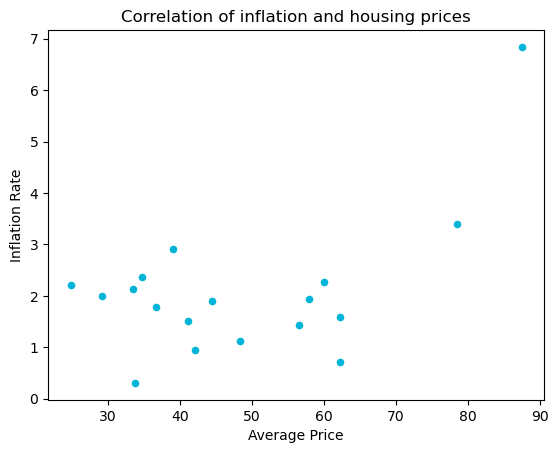

In [48]:
correlation_housing_inflation_df = pd.concat(
    [yearly_housing_data, yearly_inflation_df], axis="columns", join="outer")
correlation_housing_inflation_df.plot(kind='scatter',title="Correlation of inflation and housing prices", 
                                               x="Average Price", y="Inflation Rate", color = '#00B4D8')

In [25]:
combined_df = pd.concat([yearly_housing_data, yearly_inflation_df, population_df, yearly_interest_df], axis="columns", join="inner")
combined_df

,Average Price,Inflation Rate,Population,Prime Rate
Year,,,,
2005.0,24.78,2.215000,32.24,4.395264
2006.0,29.06,2.005000,32.57,5.759615
2007.0,33.46,2.138333,32.89,6.100000
2008.0,34.62,2.368333,33.25,4.785817
2009.0,33.68,0.308333,33.63,2.423798
2010.0,36.63,1.775833,34.00,2.585817
2011.0,39.01,2.913333,34.34,3.000000
2012.0,41.10,1.519167,34.71,3.000000
2013.0,41.98,0.940000,35.08,3.000000


In [28]:
combined_df.hvplot(
    x='Year', 
    label='Correlation of housing price, inflation rate, population, and interest rate',
    color = ['#FFB703', '#023047', '#00B4D8', '#90E0EF'])

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [50]:
combined_df.hvplot.scatter(x='Average Price', y=['Population', 'Inflation Rate', 'Prime Rate'], label='Correlation of housing price, inflation rate, population, and interest rate', color = ['#FFB703', '#023047', '#00B4D8', '#90E0EF'])

:NdOverlay   [Variable]
   :Scatter   [Average Price]   (value)